<h1>TITANIC SURVIVAL GUESSER AI<h1>

<h3>This model figures out whether a passenger will survive or not in the great titanic incident<h3>
<h3>The Variables:<h3>
<h4>Class of the passenger cabin</h4>
<h4>Age of the passenger</h4>
<h4>Gender of the passenger</h4>
<h4>Fee of the ticket</h4>
<h4>Cabin No of the passenger</h4>
<hr>
<p>The data is acquired from the Kaggle Challenge "Titanic - Machine Learning from Disaster"</p>

<h2 style = "color: blue">Importing Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



<h2 style = "color: blue">Loading the Data</h2>

In [2]:
titanic_df = pd.read_csv("train.csv", encoding = "ISO-8859-1")

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h2 style = "color: blue">Removing and Filling the Empty Numerical Data</h2>

In [4]:
train_num=list(titanic_df.select_dtypes(exclude='object'))

In [5]:
train_num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
train_missing_num_col=[]
for col in train_num:
    if titanic_df[col].isnull().any():
        train_missing_num_col.append(col)
train_missing_num_col     

['Age']

In [7]:
temp=titanic_df[['Age']]
temp

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Deleting the "Age" column and creating another column which is the filled version of "Age" with dummy values

In [8]:
titanic_df.drop(['Age'],inplace=True,axis=1)

In [9]:
my_imputer=SimpleImputer()
imputed_temp = pd.DataFrame(my_imputer.fit_transform(temp))
imputed_temp.columns = temp.columns

In [10]:
imputed_temp

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [11]:
titanic_df=pd.concat([titanic_df,imputed_temp],axis=1)

In [12]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.000000


<h2 style = "color: blue">Removing and Filling the Empty Categorical Data</h2>

Figuring out whether there are empty values or not in the categorical dataset

In [13]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode(),inplace=True)

In [14]:
dummy1=pd.get_dummies(titanic_df[['Sex','Embarked']])
dummy1

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [15]:
train_cat=list(titanic_df.select_dtypes(include='object'))
train_missing_obj_col=[]
for col in train_cat:
    if titanic_df[col].isnull().any():
        train_missing_obj_col.append(col)
train_missing_obj_col

['Cabin', 'Embarked']

Updating the categorical "Sex" and "Embarked" categories into their respected numerical representations

In [16]:
titanic_df.drop(train_missing_obj_col ,axis=1,inplace=True)

In [17]:
titanic_df=pd.concat([titanic_df,dummy1],axis=1)

In [18]:
titanic_df.drop(['Name','PassengerId','Sex','Ticket'],axis=1,inplace=True)

In [19]:
titanic_df

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,0,1,0,0,1
1,1,1,1,0,71.2833,38.000000,1,0,1,0,0
2,1,3,0,0,7.9250,26.000000,1,0,0,0,1
3,1,1,1,0,53.1000,35.000000,1,0,0,0,1
4,0,3,0,0,8.0500,35.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0,1,0,0,1
887,1,1,0,0,30.0000,19.000000,1,0,0,0,1
888,0,3,1,2,23.4500,29.699118,1,0,0,0,1
889,1,1,0,0,30.0000,26.000000,0,1,1,0,0


<h2 style = "color: blue">Damping the Skewness</h2>

In [20]:
titanic_df['Age']=np.log(titanic_df['Age']+1)

In [21]:
titanic_df['Fare']=np.log(titanic_df['Fare']+1)

In [22]:
titanic_df

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,2.110213,3.135494,0,1,0,0,1
1,1,1,1,0,4.280593,3.663562,1,0,1,0,0
2,1,3,0,0,2.188856,3.295837,1,0,0,0,1
3,1,1,1,0,3.990834,3.583519,1,0,0,0,1
4,0,3,0,0,2.202765,3.583519,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,2.639057,3.332205,0,1,0,0,1
887,1,1,0,0,3.433987,2.995732,1,0,0,0,1
888,0,3,1,2,3.196630,3.424234,1,0,0,0,1
889,1,1,0,0,3.433987,3.295837,0,1,1,0,0


In [23]:
titanic_df.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [24]:
titanic_df

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,2.110213,3.135494,0,1,0,0,1
1,1,1,1,0,4.280593,3.663562,1,0,1,0,0
2,1,3,0,0,2.188856,3.295837,1,0,0,0,1
3,1,1,1,0,3.990834,3.583519,1,0,0,0,1
4,0,3,0,0,2.202765,3.583519,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,2.639057,3.332205,0,1,0,0,1
887,1,1,0,0,3.433987,2.995732,1,0,0,0,1
888,0,3,1,2,3.196630,3.424234,1,0,0,0,1
889,1,1,0,0,3.433987,3.295837,0,1,1,0,0


In [25]:
y_titanic_df = titanic_df["Survived"]


In [26]:
y_titanic_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
titanic_df.drop(["Survived"],axis = 1)

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,2.110213,3.135494,0,1,0,0,1
1,1,1,0,4.280593,3.663562,1,0,1,0,0
2,3,0,0,2.188856,3.295837,1,0,0,0,1
3,1,1,0,3.990834,3.583519,1,0,0,0,1
4,3,0,0,2.202765,3.583519,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,2.639057,3.332205,0,1,0,0,1
887,1,0,0,3.433987,2.995732,1,0,0,0,1
888,3,1,2,3.196630,3.424234,1,0,0,0,1
889,1,0,0,3.433987,3.295837,0,1,1,0,0


<h2 style = "color: blue">Preparing the Data for Training</h2>

In [29]:
scaler = MinMaxScaler()
titanic_df = scaler.fit_transform(titanic_df)

In [30]:
y_titanic_df = y_titanic_df.values.reshape(-1,1)

In [31]:
y_titanic_df

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [32]:
titanic_df.shape

(891, 11)

In [33]:
y_titanic_df = scaler.fit_transform(y_titanic_df)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df, y_titanic_df, test_size = 0.25)

<h2 style = "color: blue">Designing a Tensorflow model</h2>

In [42]:
model = Sequential()
model.add(Dense(15, input_dim = 11, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "linear"))

In [36]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics=["accuracy"])

<h2 style = "color: blue">Traning the Data</h2>

In [37]:
epochs_hist = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/50
17/17 [==============================] - 2s 12ms/step - loss: 0.2830 - accuracy: 0.6161 - val_loss: 0.2170 - val_accuracy: 0.6493
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1922 - accuracy: 0.6873 - val_loss: 0.1585 - val_accuracy: 0.7388
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.8296 - val_loss: 0.1083 - val_accuracy: 0.8358
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9157 - val_loss: 0.0710 - val_accuracy: 0.9627
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9719 - val_loss: 0.0403 - val_accuracy: 0.9776
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9944 - val_loss: 0.0218 - val_accuracy: 0.9851
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9981 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 8/50
17/17 [=

<h2 style = "color: blue">Evaluating the Data</h2>

In [38]:
y_predict = model.predict(X_test)

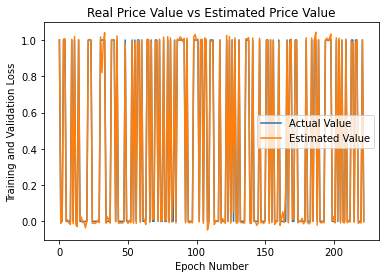

In [39]:
plt.plot(y_test)
plt.plot(y_predict)
plt.title("Real Price Value vs Estimated Price Value")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(["Actual Value","Estimated Value"])